In [1]:
import pandas as pd
from astropy.io import fits
from astropy.io.fits.verify import VerifyWarning
#warnings.simplefilter('ignore', category=VerifyWarning)
import numpy as np
import os

In [2]:
#df = pd.read_json('data/datalists/datalist_resized64_all.json')
#df = pd.read_json('data/datalists/datalist_resized64_masked_all.json')
#df = pd.read_json('data/datalists/datalist_resized64_upscaling_all.json')
#df = pd.read_json('data/datalists/datalist_resized64_upscaling_masked_all.json')
#df = pd.read_json('data/datalists/datalist_resized64_upscaling_all.json')
df = pd.read_json('data/datalists/datalist.json')

exp_name = "background_cropped_raw"

data = df["data"]

source_name_list =  map(lambda x: x["sname"], data)
survey_list =       map(lambda x: x["survey"], data)
label_list =        map(lambda x: x["label"], data)
telescope_list =    map(lambda x: x["telescope"], data)
project_list =      map(lambda x: x["project"], data)
path_list =         map(lambda x: x["filepaths"][0].removeprefix("/storage/riggi/Data/MLData/smorph-dataset/"), data)
target_path_list =  map(lambda x: "{}/{}-{}.npy".format(exp_name, x["sname"], x["survey"]), data)

metadata = pd.DataFrame()
metadata["source_name"] =   list(source_name_list)
metadata["survey"] =        list(survey_list)
metadata["label"] =         list(label_list)
metadata["telescope"] =     list(telescope_list)
metadata["project"] =       list(project_list)
metadata["path"] =          list(path_list)
metadata["target_path"] =   list(target_path_list)

#print(metadata.to_string())
#print(list(survey_list))
#print(data.to_string()) 

In [3]:
metadata.describe()

source_name survey       label telescope         project  \
count             20489  20489       20489     20489           20489   
unique            15847      5           7         5               8   
top     galaxy0002_obj1    emu  COMPACT-C1     askap  scorpio-pilot2   
freq                 13   9557       10557      9557            8679   

                                                     path  \
count                                               20489   
unique                                              20485   
top     data/extended/askap-emu-pilot1_SB9442/original...   
freq                                                    2   

                                            target_path  
count                                             20489  
unique                                            16609  
top     background_cropped_raw/galaxy0056_obj1-mgps.npy  
freq                                                  7

In [4]:
metadata.head()

source_name survey       label telescope         project  \
0        S100    emu  COMPACT-C1     askap  scorpio-pilot2   
1        S103    emu  COMPACT-C1     askap  scorpio-pilot2   
2        S104    emu  COMPACT-C1     askap  scorpio-pilot2   
3        S107    emu  COMPACT-C1     askap  scorpio-pilot2   
4        S108    emu  COMPACT-C1     askap  scorpio-pilot2   

                                                path  \
0  data/point-like/askap-emu-pilot2_SB32526/origi...   
1  data/point-like/askap-emu-pilot2_SB32526/origi...   
2  data/point-like/askap-emu-pilot2_SB32526/origi...   
3  data/point-like/askap-emu-pilot2_SB32526/origi...   
4  data/point-like/askap-emu-pilot2_SB32526/origi...   

                          target_path  
0  background_triple_raw/S100-emu.npy  
1  background_triple_raw/S103-emu.npy  
2  background_triple_raw/S104-emu.npy  
3  background_triple_raw/S107-emu.npy  
4  background_triple_raw/S108-emu.npy

In [5]:
# Creates a sorted dictionary (sorted by key)
from collections import OrderedDict

max_shape_dict = {}
max_shape_list = []
for _, record in metadata.iterrows():
    if os.path.exists(record["path"]):
        hdul = fits.open(record["path"])
        #print(hdul[0].header[''])
        npy_image = hdul[0].data
        max_shape_list.append(np.max(npy_image.shape))
        if str(np.max(npy_image.shape)) in max_shape_dict:
            max_shape_dict[str(np.max(npy_image.shape))] += 1
        else:
            max_shape_dict[str(np.max(npy_image.shape))] = 1
    else:
        print(record["path"])
#print(set(max_shape_list))
myKeys = list(map(int, max_shape_dict.keys()))
myKeys.sort()
sorted_dict = {i: max_shape_dict[str(i)] for i in myKeys}
#max_shape_dict = OrderedDict(sorted(int(max_shape_dict.items())))
print(sorted_dict)
metadata["max_shape"] = max_shape_list

{3: 13, 4: 325, 5: 811, 6: 1096, 7: 1182, 8: 1133, 9: 1104, 10: 1046, 11: 916, 12: 721, 13: 662, 14: 529, 15: 457, 16: 421, 17: 371, 18: 309, 19: 289, 20: 291, 21: 277, 22: 248, 23: 257, 24: 233, 25: 228, 26: 182, 27: 183, 28: 170, 29: 173, 30: 177, 31: 158, 32: 142, 33: 111, 34: 111, 35: 96, 36: 108, 37: 85, 38: 99, 39: 105, 40: 93, 41: 90, 42: 99, 43: 72, 44: 68, 45: 62, 46: 73, 47: 60, 48: 57, 49: 71, 50: 47, 51: 57, 52: 57, 53: 32, 54: 54, 55: 49, 56: 38, 57: 30, 58: 36, 59: 46, 60: 30, 61: 24, 62: 27, 63: 22, 64: 3905, 65: 23, 66: 20, 67: 27, 68: 20, 69: 17, 70: 22, 71: 14, 72: 15, 73: 16, 74: 14, 75: 10, 76: 10, 77: 4, 78: 13, 79: 12, 80: 10, 81: 7, 82: 6, 83: 6, 84: 4, 85: 13, 86: 1, 87: 4, 88: 7, 89: 7, 90: 4, 91: 4, 92: 3, 93: 2, 94: 1, 95: 3, 96: 3, 97: 3, 98: 4, 99: 6, 100: 3, 101: 3, 102: 4, 103: 8, 104: 1, 105: 4, 106: 4, 107: 5, 108: 1, 109: 7, 110: 4, 111: 4, 112: 2, 113: 5, 115: 3, 117: 5, 118: 2, 119: 5, 120: 3, 121: 3, 122: 1, 124: 2, 125: 1, 126: 1, 127: 2, 128: 4, 1

In [16]:


# checking if the directory demo_folder 
# exist or not.

if not os.path.exists("exp1"):
    os.makedirs("exp1")

if not os.path.exists(exp_name):
    os.makedirs(exp_name)

for _, record in metadata.iterrows():
    hdul = fits.open(record["path"])
    #print(hdul[0].header[''])
    npy_image = hdul[0].data
    #np.save("raw_dataset/{}-{}.npy".format(record["source_name"], record["survey"]), npy_image)
    min_image = np.min(npy_image)
    npy_image[npy_image == 0.0] = min_image
    #np.save("preprocessed_dataset/{}-{}.npy".format(record["source_name"], record["survey"]), npy_image)
    max_image = np.max(npy_image)
    npy_image = (npy_image - min_image) / (max_image - min_image) # MinMax normalization
    min_image = np.min(npy_image)
    max_image = np.max(npy_image)
    if (min_image < 0.) or (max_image > 1.):
        print(record["source_name"])
        print(record["survey"])
    #record["target_path"] = "{}/{}-{}.npy".format(exp_name, record["source_name"], record["survey"])
    #np.save(record["target_path"], np.expand_dims(npy_image, -1))
    #np.save("preprocessed_min_max_dataset_3dimension_shape/{}-{}.npy".format(record["source_name"], record["survey"]), np.expand_dims(npy_image, -1))
    #np.savez("preprocessed_min_max_dataset_npz/{}-{}.npy".format(record["source_name"], record["survey"]), npy_image)

FileNotFoundError: [Errno 2] No such file or directory: 'data/extended/RGZ_C2/original/imgs/galaxy0001_obj1.fits'

In [6]:
print(metadata.head)

<bound method NDFrame.head of       source_name survey       label telescope         project  \
0            S100    emu  COMPACT-C1     askap  scorpio-pilot2   
1            S103    emu  COMPACT-C1     askap  scorpio-pilot2   
2            S104    emu  COMPACT-C1     askap  scorpio-pilot2   
3            S107    emu  COMPACT-C1     askap  scorpio-pilot2   
4            S108    emu  COMPACT-C1     askap  scorpio-pilot2   
...           ...    ...         ...       ...             ...   
20484     bkg3879    emu  BACKGROUND     askap  scorpio-pilot2   
20485     bkg3880    emu  BACKGROUND     askap  scorpio-pilot2   
20486     bkg3881    emu  BACKGROUND     askap  scorpio-pilot2   
20487     bkg3882    emu  BACKGROUND     askap  scorpio-pilot2   
20488     bkg3883    emu  BACKGROUND     askap  scorpio-pilot2   

                                                    path  \
0      data/point-like/askap-emu-pilot2_SB32526/origi...   
1      data/point-like/askap-emu-pilot2_SB32526/origi... 

In [28]:
for label in metadata["label"].unique():
    numerosity = metadata[metadata["label"] == label]["label"].count()
    print("Label: {}, Count: {}".format(label, numerosity))

Label: COMPACT-C1, Count: 10557
Label: COMPACT-C2, Count: 268
Label: COMPACT-C3, Count: 430
Label: EXTENDED, Count: 3357
Label: EXTENDED-MULTISLAND, Count: 1654
Label: DIFFUSE, Count: 340
Label: BACKGROUND, Count: 3883


In [8]:
for label in metadata["label"].unique():
    max_shape = metadata[metadata["label"] == label]["max_shape"].max()
    min_shape = metadata[metadata["label"] == label]["max_shape"].min()
    print("Label: {}, Min_dim: {}, Max_dim: {}".format(label, min_shape, max_shape))

Label: COMPACT-C1, Min_dim: 3, Max_dim: 34
Label: COMPACT-C2, Min_dim: 6, Max_dim: 60
Label: COMPACT-C3, Min_dim: 16, Max_dim: 53
Label: EXTENDED, Min_dim: 6, Max_dim: 128
Label: EXTENDED-MULTISLAND, Min_dim: 16, Max_dim: 128
Label: DIFFUSE, Min_dim: 12, Max_dim: 585
Label: BACKGROUND, Min_dim: 64, Max_dim: 64


In [9]:
for label in metadata["label"].unique():
    unique_shapes = metadata[metadata["label"] == label]["max_shape"].unique()
    for u_s in sorted(unique_shapes):
        count = metadata[(metadata["label"] == label) & (metadata["max_shape"] == u_s)]["max_shape"].count()
        print("Label: {}, shape: {}, count: {}".format(label, u_s, count))
    #min_shape = metadata[metadata["label"] == label]["max_shape"].min()
    #print("Label: {}, Min_dim: {}, Max_dim: {}".format(label, min_shape, max_shape))

Label: COMPACT-C1, shape: 3, count: 13
Label: COMPACT-C1, shape: 4, count: 325
Label: COMPACT-C1, shape: 5, count: 811
Label: COMPACT-C1, shape: 6, count: 1093
Label: COMPACT-C1, shape: 7, count: 1181
Label: COMPACT-C1, shape: 8, count: 1129
Label: COMPACT-C1, shape: 9, count: 1093
Label: COMPACT-C1, shape: 10, count: 1023
Label: COMPACT-C1, shape: 11, count: 868
Label: COMPACT-C1, shape: 12, count: 672
Label: COMPACT-C1, shape: 13, count: 570
Label: COMPACT-C1, shape: 14, count: 413
Label: COMPACT-C1, shape: 15, count: 328
Label: COMPACT-C1, shape: 16, count: 242
Label: COMPACT-C1, shape: 17, count: 197
Label: COMPACT-C1, shape: 18, count: 140
Label: COMPACT-C1, shape: 19, count: 106
Label: COMPACT-C1, shape: 20, count: 97
Label: COMPACT-C1, shape: 21, count: 69
Label: COMPACT-C1, shape: 22, count: 52
Label: COMPACT-C1, shape: 23, count: 39
Label: COMPACT-C1, shape: 24, count: 30
Label: COMPACT-C1, shape: 25, count: 22
Label: COMPACT-C1, shape: 26, count: 19
Label: COMPACT-C1, shape: 

In [56]:
values = metadata[(metadata["label"] == "EXTENDED") & (metadata["max_shape"] == 6)]["path"]
np.savetxt(r'data.txt', values, fmt='%s')

In [10]:
metadata.head()

source_name survey       label telescope         project  \
0        S100    emu  COMPACT-C1     askap  scorpio-pilot2   
1        S103    emu  COMPACT-C1     askap  scorpio-pilot2   
2        S104    emu  COMPACT-C1     askap  scorpio-pilot2   
3        S107    emu  COMPACT-C1     askap  scorpio-pilot2   
4        S108    emu  COMPACT-C1     askap  scorpio-pilot2   

                                                path  \
0  data/point-like/askap-emu-pilot2_SB32526/origi...   
1  data/point-like/askap-emu-pilot2_SB32526/origi...   
2  data/point-like/askap-emu-pilot2_SB32526/origi...   
3  data/point-like/askap-emu-pilot2_SB32526/origi...   
4  data/point-like/askap-emu-pilot2_SB32526/origi...   

                          target_path  max_shape  
0  background_triple_raw/S100-emu.npy         11  
1  background_triple_raw/S103-emu.npy          9  
2  background_triple_raw/S104-emu.npy         14  
3  background_triple_raw/S107-emu.npy          9  
4  background_triple_raw/S108-emu.npy          9

In [11]:
for label in metadata["survey"].unique():
    numerosity = metadata[metadata["survey"] == label]["survey"].count()
    print("Survey: {}, Count: {}".format(label, numerosity))

Survey: emu, Count: 9557
Survey: mgps, Count: 4855
Survey: first, Count: 5890
Survey: scorpio, Count: 117
Survey: mixed, Count: 70


In [12]:
for label in metadata["telescope"].unique():
    numerosity = metadata[metadata["telescope"] == label]["telescope"].count()
    print("{}: {}".format(label, numerosity))

askap: 9557
meerkat: 4855
vla: 5890
atca: 117
mixed: 70


In [11]:
for label in metadata["project"].unique():
    numerosity = metadata[metadata["project"] == label]["project"].count()
    print("{}: {}".format(label, numerosity))

scorpio-pilot2: 8681
scorpio-pilot1: 504
lband-legacy: 4855
radio-galaxy-zoo-dr1: 5464
scorpio-earlyscience: 337
pilot1: 37
scorpio-2_1GHz: 117
dragns: 70


In [12]:
for label in metadata["survey"].unique():
    project = metadata[metadata["survey"] == label]["project"].unique()
    print(label)
    print(project)
    #print("{}: {}".format(label, numerosity))

emu
['scorpio-pilot2' 'scorpio-pilot1' 'scorpio-earlyscience' 'pilot1']
mgps
['lband-legacy']
first
['radio-galaxy-zoo-dr1']
scorpio
['scorpio-2_1GHz']
mixed
['dragns']


In [10]:
for label in metadata["label"].unique():
    survey = metadata[metadata["label"] == label]["survey"].unique()
    print(label)
    print(survey)
    #print("{}: {}".format(label, numerosity))

POINT-LIKE
['emu']
COMPACT
['emu' 'mgps' 'first']
EXTENDED
['emu' 'scorpio' 'mixed' 'mgps' 'first']
EXTENDED-MULTISLAND
['emu' 'scorpio' 'mixed' 'mgps' 'first']
DIFFUSE
['emu' 'mgps']


In [11]:
for label in metadata["label"].unique():
    surveys = metadata[metadata["label"] == label]["survey"].unique()
    print(label)
    print(surveys)
    for surv in surveys:
        surv_count = metadata[(metadata["label"] == label) & (metadata["survey"] == surv)]["survey"].count()
        print("{}: {}".format(surv, surv_count)) 
    #print("{}: {}".format(label, numerosity))

POINT-LIKE
['emu']
emu: 4436
COMPACT
['emu' 'mgps' 'first']
emu: 443
mgps: 3704
first: 2281
EXTENDED
['emu' 'scorpio' 'mixed' 'mgps' 'first']
emu: 742
scorpio: 110
mixed: 58
mgps: 720
first: 1731
EXTENDED-MULTISLAND
['emu' 'scorpio' 'mixed' 'mgps' 'first']
emu: 59
scorpio: 7
mixed: 12
mgps: 107
first: 1469
DIFFUSE
['emu' 'mgps']
emu: 15
mgps: 325


In [13]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [13]:
raw_path = "/home/riggi/Data/MLData/smorph-dataset/data/point-like/askap-emu-pilot2_SB32526/resized64/imgs/S100.fits"
relative_path = raw_path.split()

In [14]:
file_path = "data/point-like/askap-emu-pilot2_SB32526/resized64/imgs/S100.fits"
hdul = fits.open(file_path)
npy_image = hdul[0].data


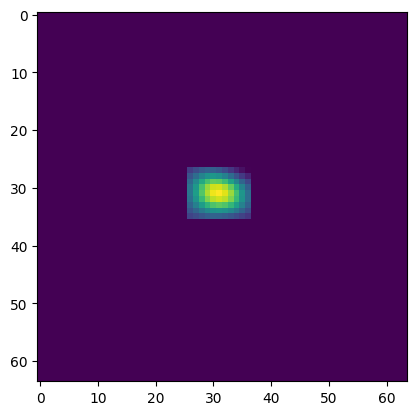

In [15]:
imgplot = plt.imshow(npy_image)

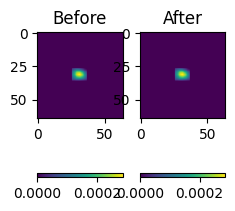

In [16]:


fig = plt.figure()
ax = fig.add_subplot(1, 5, 1)
imgplot = plt.imshow(npy_image)
ax.set_title('Before')
plt.colorbar(orientation='horizontal')
ax = fig.add_subplot(1, 5, 2)
imgplot = plt.imshow(npy_image)

ax.set_title('After')
plt.colorbar(orientation='horizontal')

COMPACT-C1


COMPACT-C2
COMPACT-C3
EXTENDED
EXTENDED-MULTISLAND
DIFFUSE
BACKGROUND


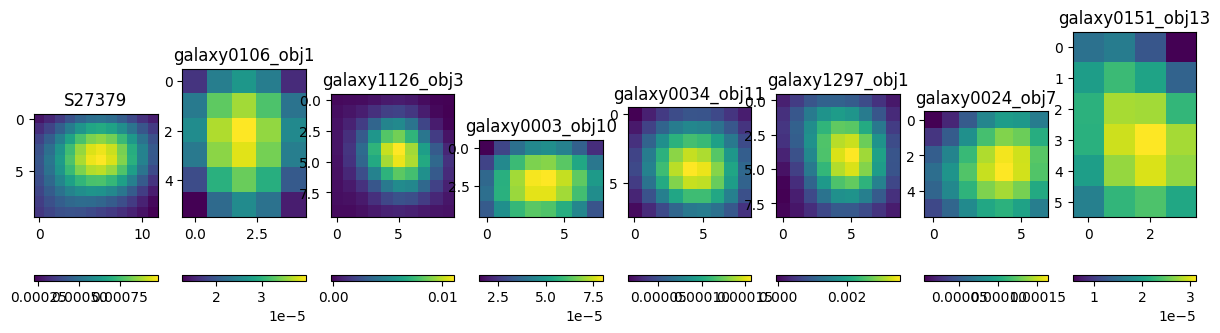

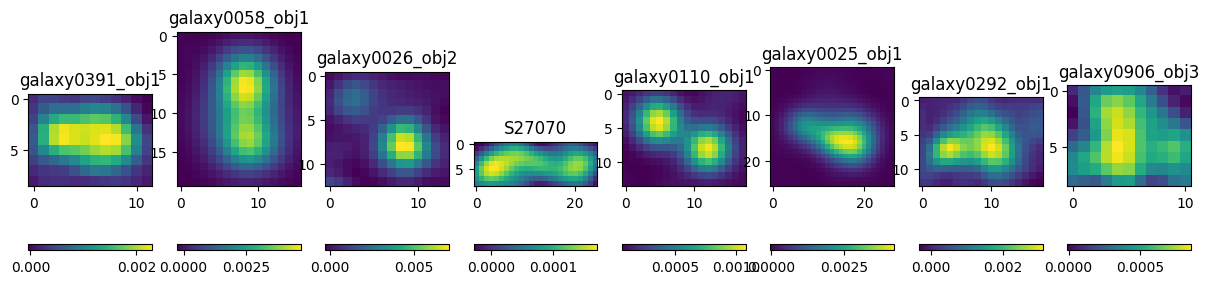

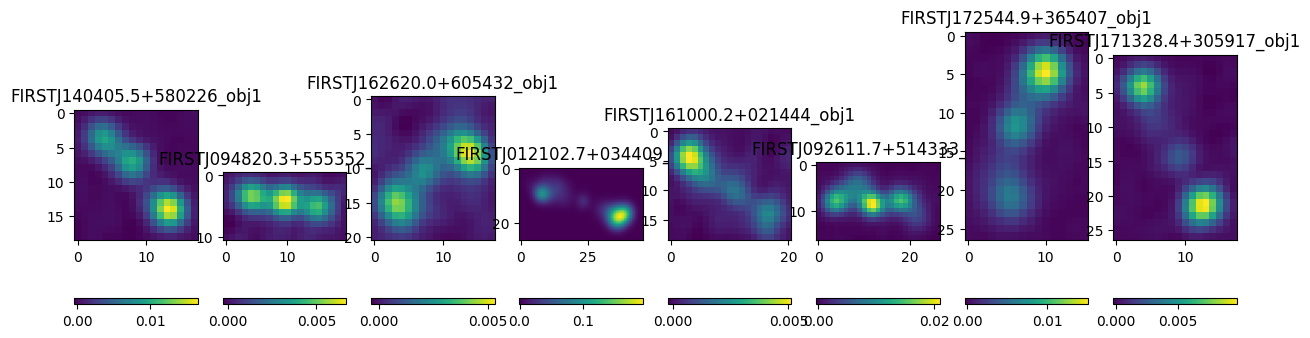

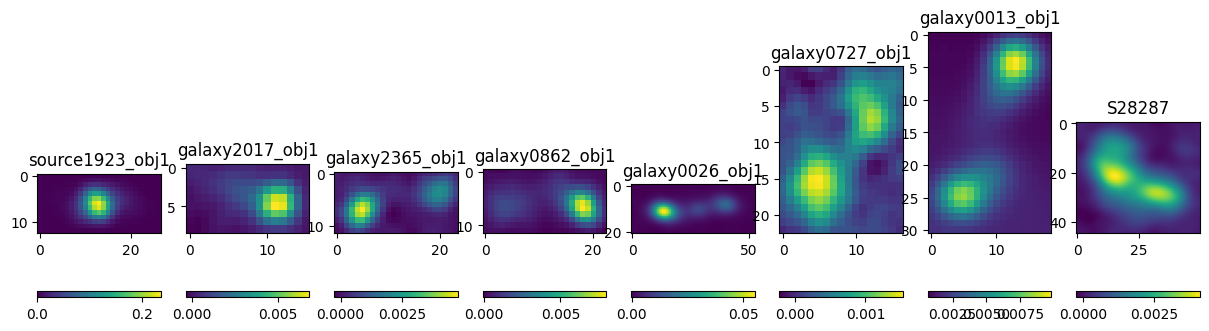

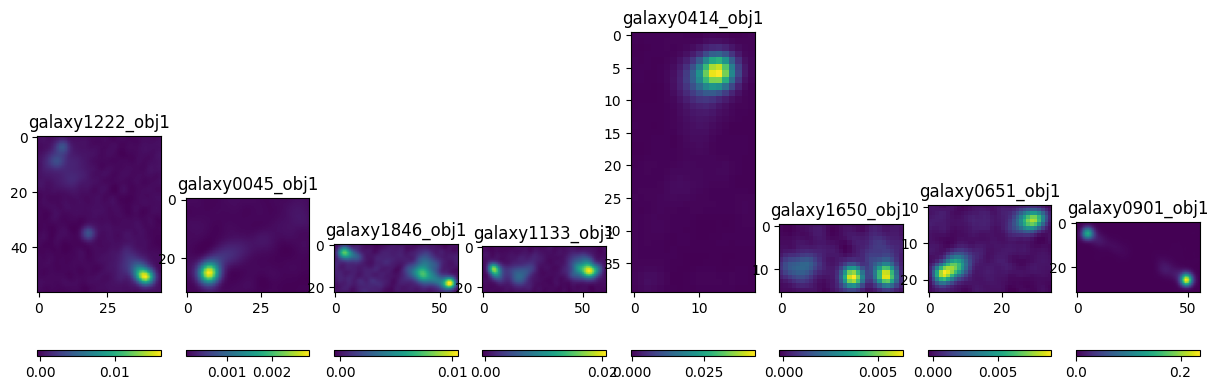

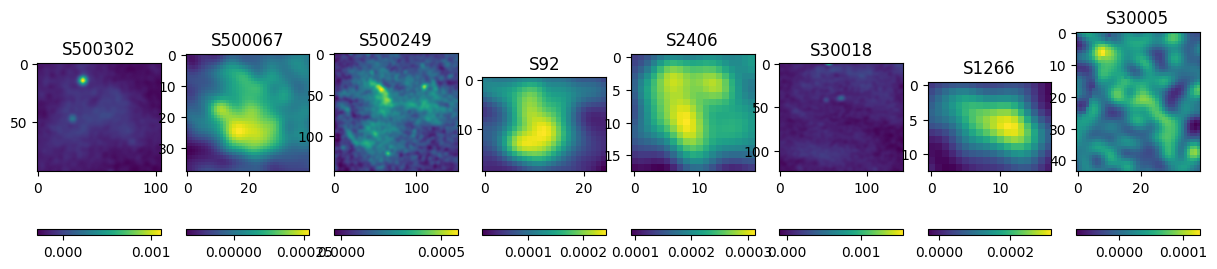

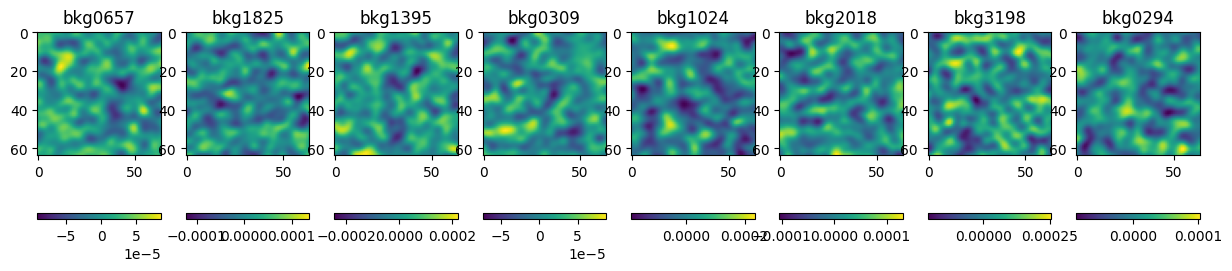

In [14]:
# Per class samples
howmany = 8
for label in metadata["label"].unique():
    print(label)
    records = metadata[metadata["label"] == label].sample(howmany)
    #print(records)
    c = 0
    fig = plt.figure(figsize=(15, 5))
    for idx, record in records.iterrows():
        c+=1
        #print(record)
        hdul = fits.open(record["path"])
        npy_image = hdul[0].data
        
        ax = fig.add_subplot(1, howmany, c)

        imgplot = plt.imshow(npy_image)
        ax.set_title(record["source_name"])
        plt.colorbar(orientation='horizontal')

emu
mgps
first
scorpio
mixed


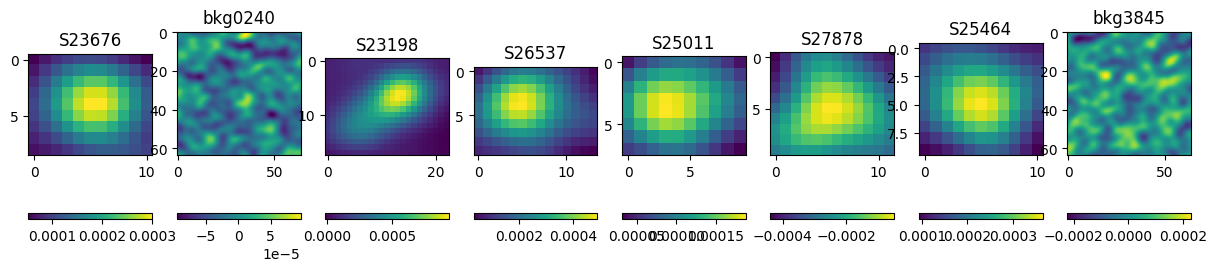

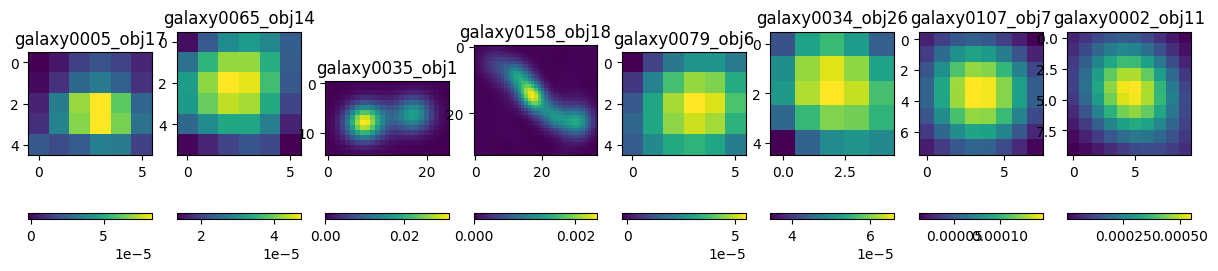

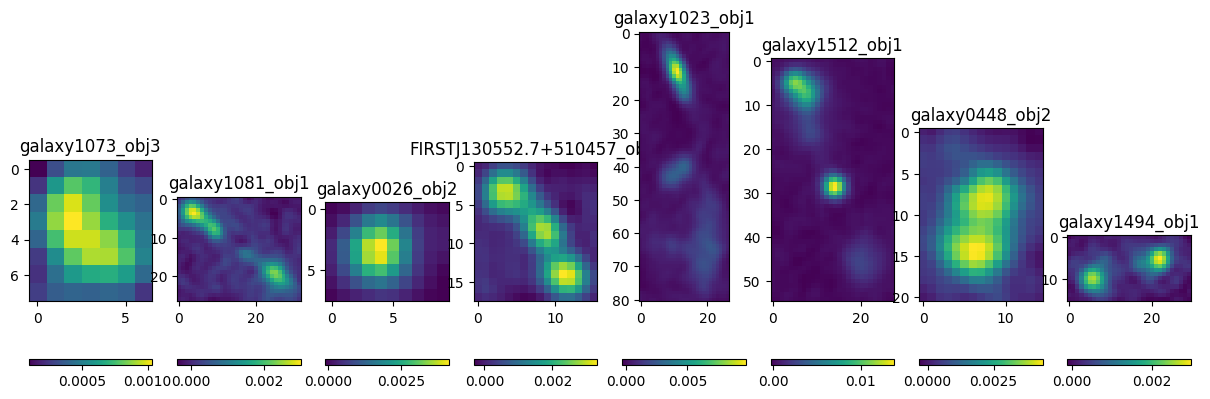

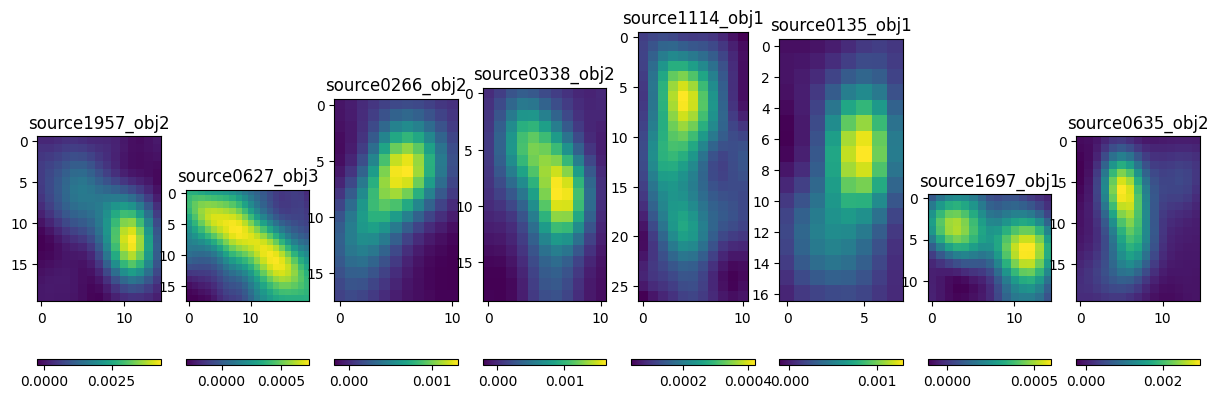

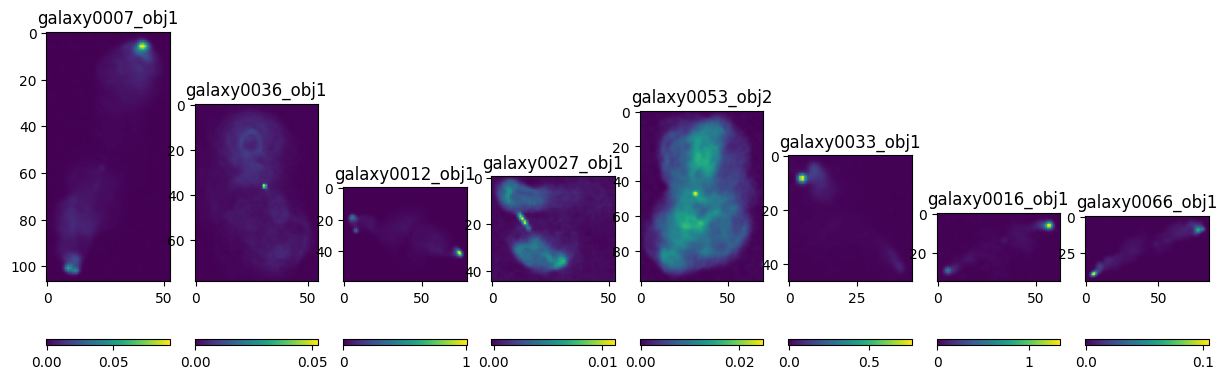

In [59]:
# Per survey samples
howmany = 8
for survey in metadata["survey"].unique():
    print(survey)
    records = metadata[metadata["survey"] == survey].sample(howmany)
    #print(records)
    c = 0
    fig = plt.figure(figsize=(15, 5))
    for idx, record in records.iterrows():
        c+=1
        #print(record)
        hdul = fits.open(record["path"])
        npy_image = hdul[0].data
        
        ax = fig.add_subplot(1, howmany, c)

        imgplot = plt.imshow(npy_image)
        ax.set_title(record["source_name"])
        plt.colorbar(orientation='horizontal')

COMPACT-C1
COMPACT-C1 - emu: 4747
COMPACT-C1 - mgps: 3637
COMPACT-C1 - first: 2173
COMPACT-C1 - scorpio: 0
COMPACT-C1 - mixed: 0
COMPACT-C2
COMPACT-C2 - emu: 111
COMPACT-C2 - mgps: 66
COMPACT-C2 - first: 91
COMPACT-C2 - scorpio: 0
COMPACT-C2 - mixed: 0
COMPACT-C3
COMPACT-C3 - emu: 4
COMPACT-C3 - mgps: 0
COMPACT-C3 - first: 426
COMPACT-C3 - scorpio: 0
COMPACT-C3 - mixed: 0
EXTENDED
EXTENDED - emu: 738
EXTENDED - mgps: 720
EXTENDED - first: 1731
EXTENDED - scorpio: 110
EXTENDED - mixed: 58
EXTENDED-MULTISLAND
EXTENDED-MULTISLAND - emu: 59
EXTENDED-MULTISLAND - mgps: 107


/tmp/ipykernel_4238/2006556723.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(15, 3))


EXTENDED-MULTISLAND - first: 1469
EXTENDED-MULTISLAND - scorpio: 7
EXTENDED-MULTISLAND - mixed: 12
DIFFUSE
DIFFUSE - emu: 15
DIFFUSE - mgps: 325
DIFFUSE - first: 0
DIFFUSE - scorpio: 0
DIFFUSE - mixed: 0
BACKGROUND
BACKGROUND - emu: 3883
BACKGROUND - mgps: 0
BACKGROUND - first: 0
BACKGROUND - scorpio: 0
BACKGROUND - mixed: 0


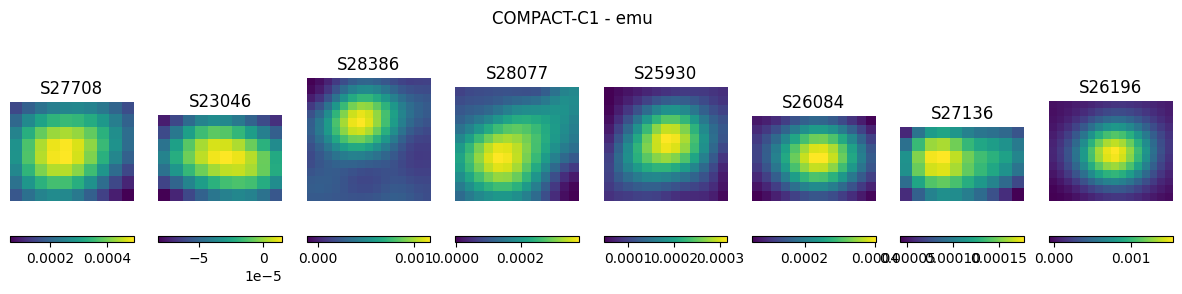

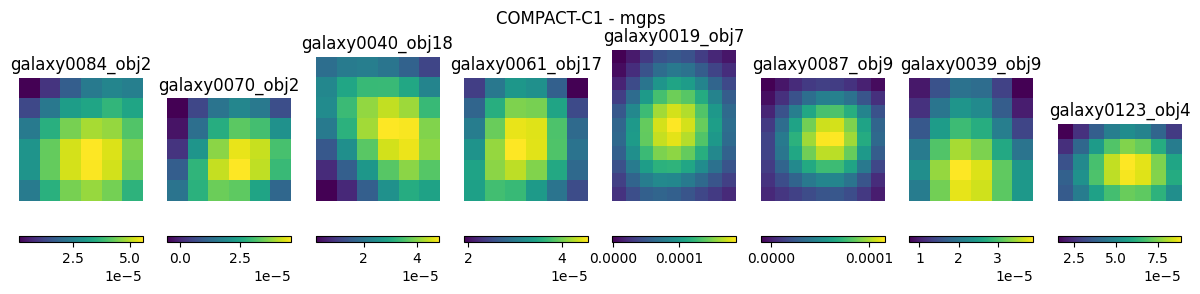

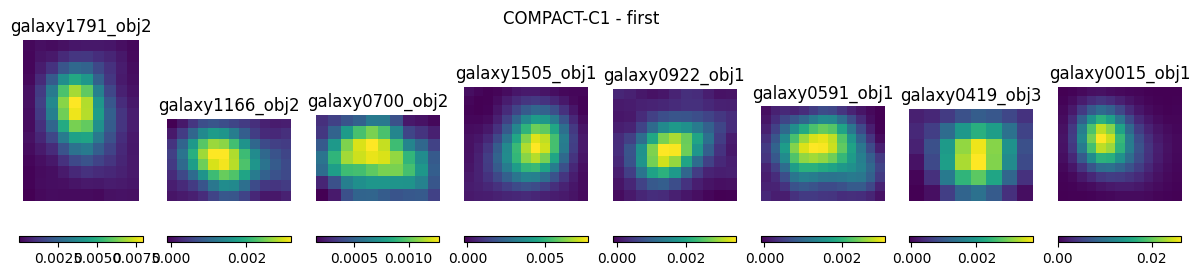

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

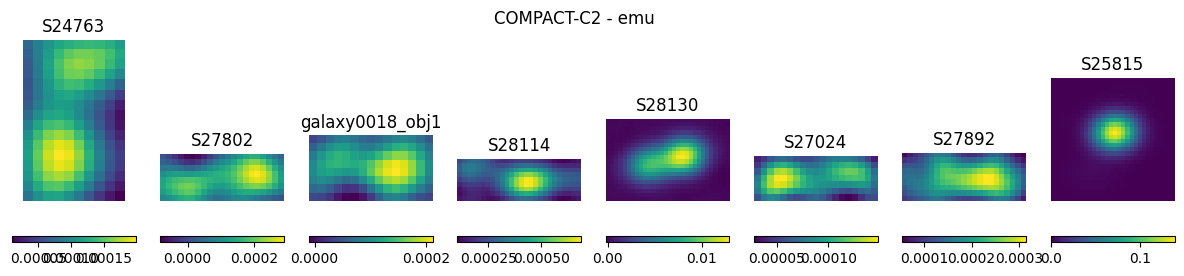

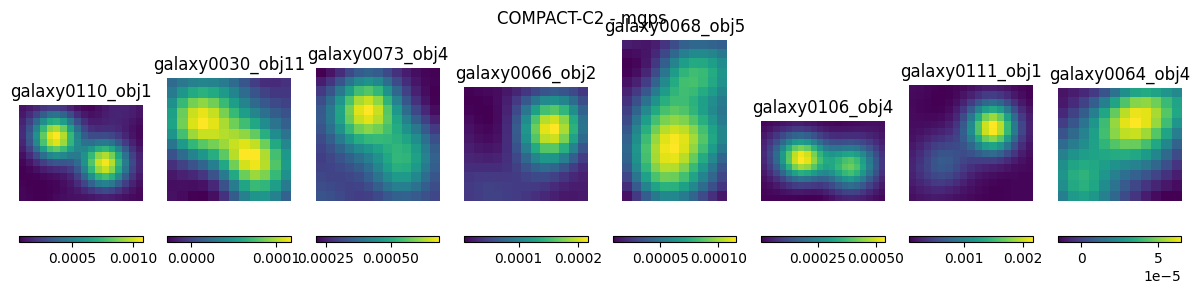

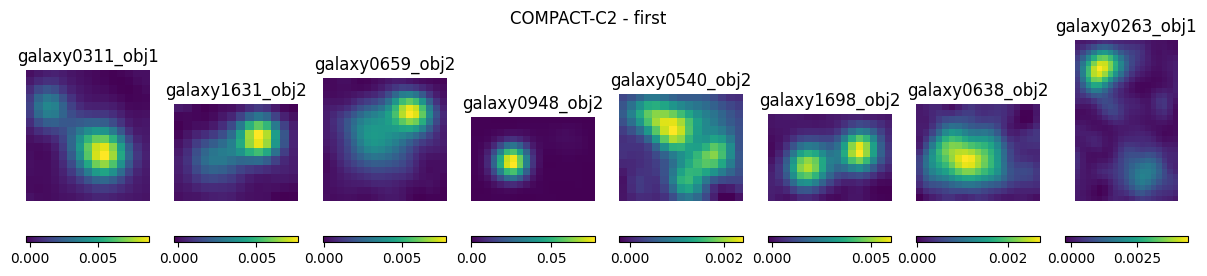

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

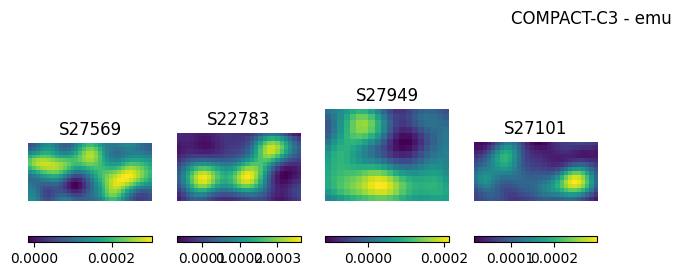

<Figure size 1500x300 with 0 Axes>

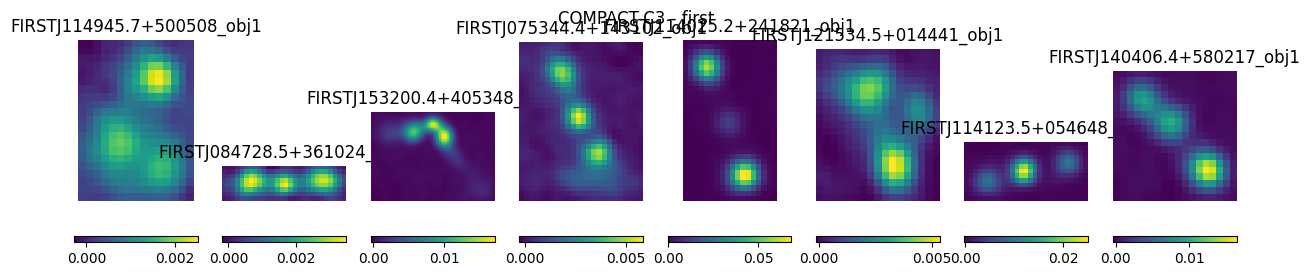

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

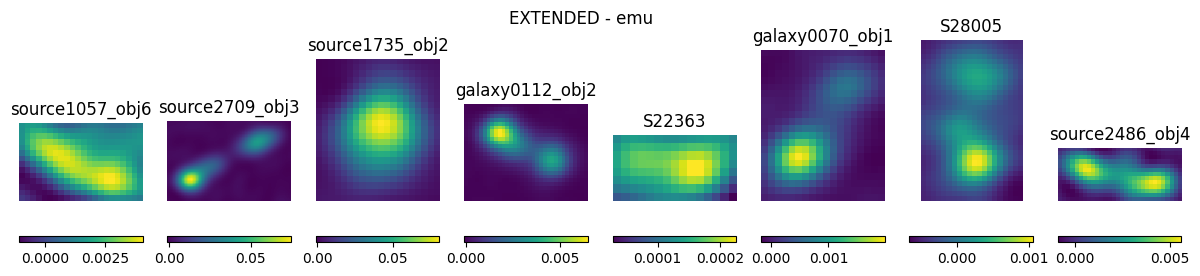

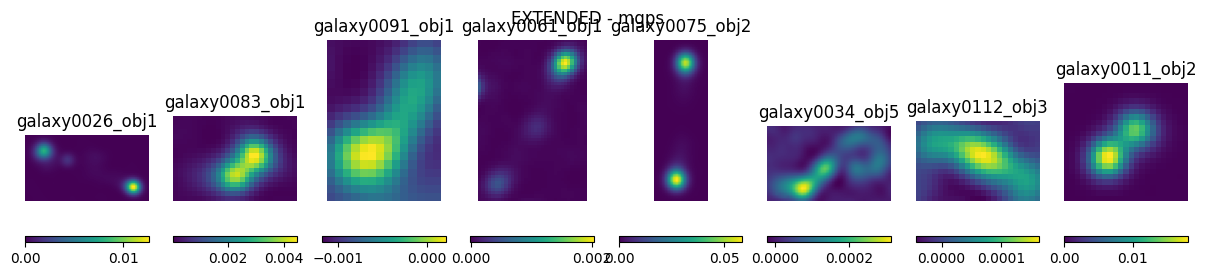

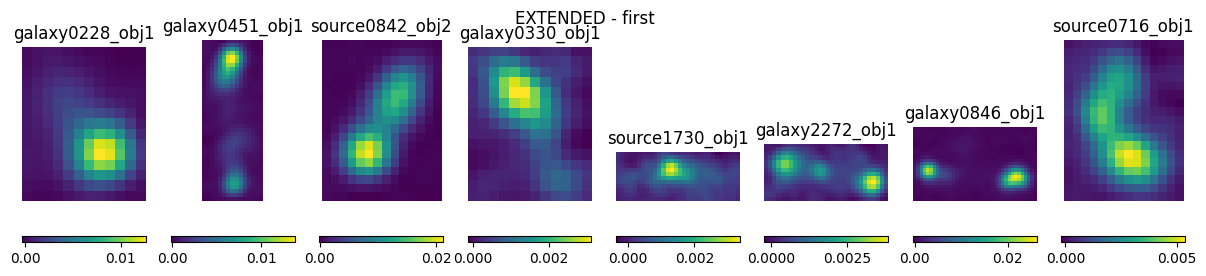

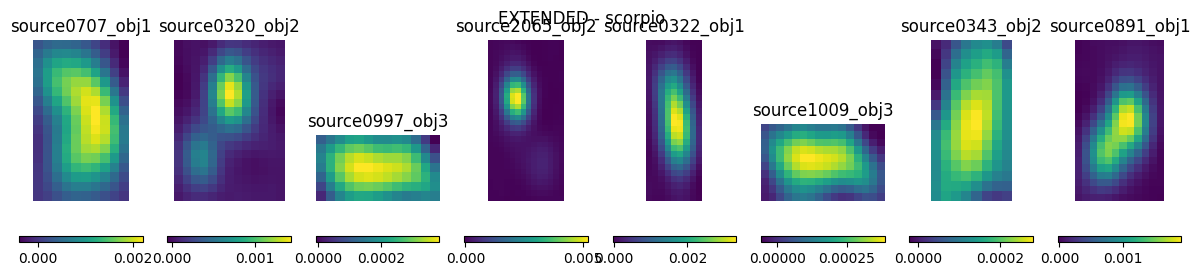

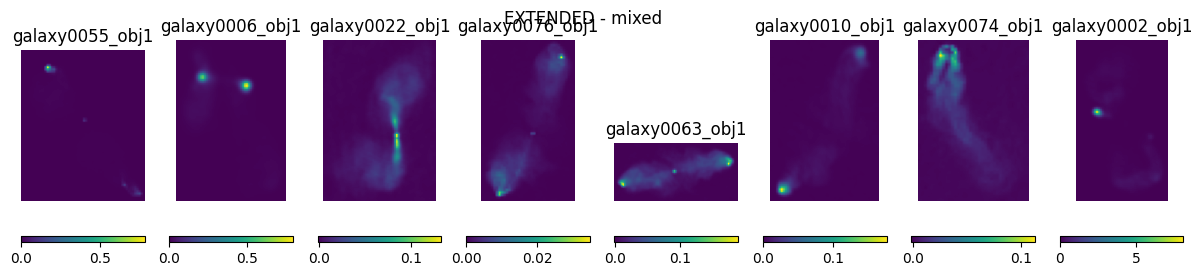

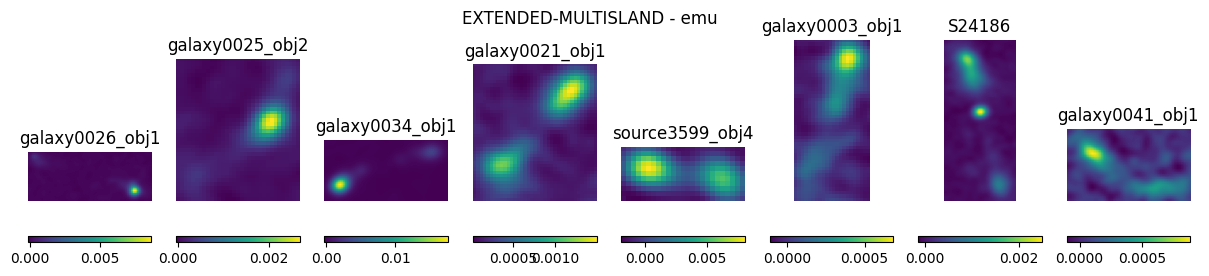

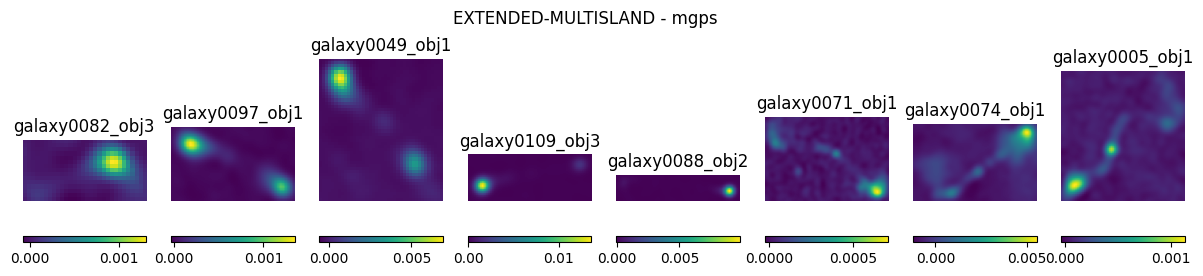

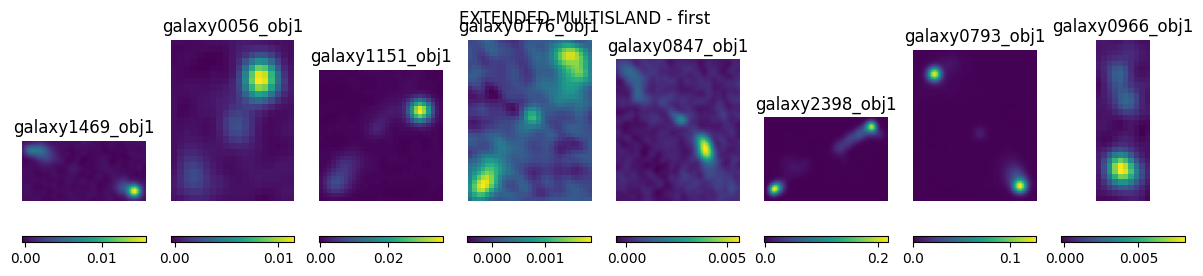

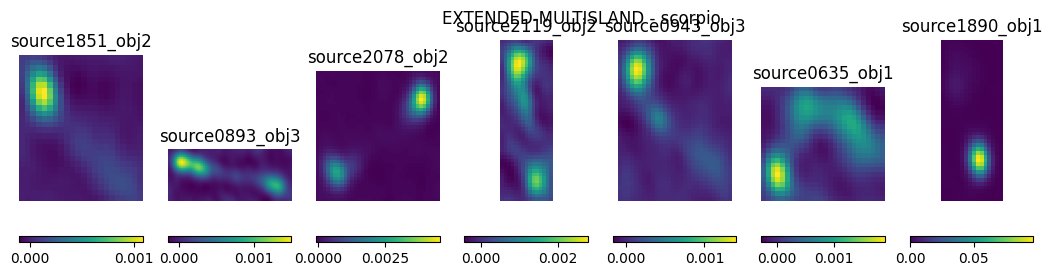

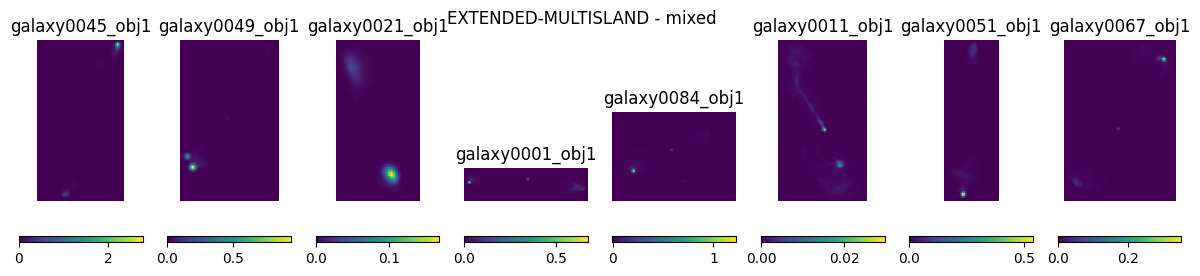

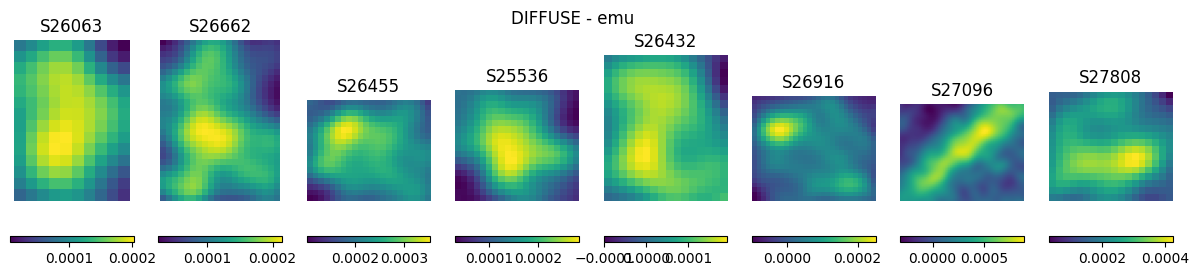

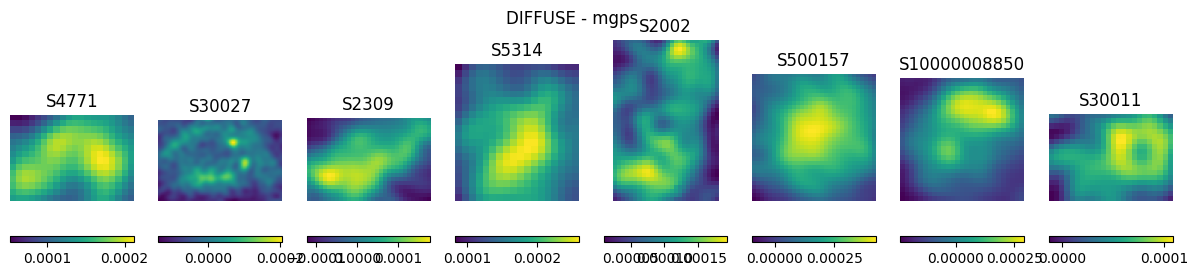

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

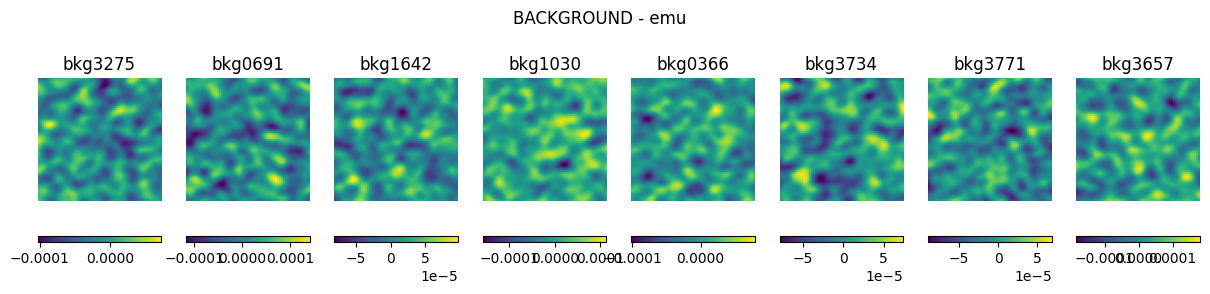

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

In [60]:
# Per class - per surbey samples
howmany = 8
for label in metadata["label"].unique():
    print(label)
    labels = metadata[metadata["label"] == label]
    for survey in metadata["survey"].unique():
        
        records = labels[labels["survey"] == survey]
        print("{} - {}: {}".format(label, survey, len(records)))
        if 0 < howmany < len(records) :
            records = labels[labels["survey"] == survey].sample(howmany)
        elif len(records) < howmany:
            records = labels[labels["survey"] == survey].sample(len(records))
        else:
            break
    
    #print(records)
        c = 0
        fig = plt.figure(figsize=(15, 3))
        fig.suptitle("{} - {}".format(label,survey), y=0.98)
        
        for idx, record in records.iterrows():
            c+=1
            #print(record)
            hdul = fits.open(record["path"])
            npy_image = hdul[0].data
            
            ax = fig.add_subplot(1, howmany, c)
            ax.axis("off")

            imgplot = plt.imshow(npy_image)
            ax.set_title(record["source_name"])
            plt.colorbar(orientation='horizontal')
        #fig.tight_layout()
        #fig.subplots_adjust(top=0.99)

In [61]:
# Per class per samples general stats

for label in metadata["label"].unique():
    print(label)
    labels = metadata[metadata["label"] == label]
    for survey in metadata["survey"].unique():
        records = labels[labels["survey"] == survey]
        print("{} - {}: {}".format(label, survey, len(records)))
        min_value = 999.
        max_value = -999.
        min_range = 999
        max_range = 0
        
        for idx, record in records.iterrows():
            #print(record)
            hdul = fits.open(record["path"])
            npy_image = hdul[0].data
            image_min = np.min(npy_image)
            min_value = image_min if image_min < min_value else min_value
            image_max = np.max(npy_image)
            max_value = image_max if image_max > max_value else max_value
            
            image_range = image_max - image_min
            min_range = image_range if image_range < min_range else min_range
            max_range = image_range if image_range > max_range else max_range
            
        if len(records) > 0:
            print("{} - {} - Min value: {}".format(label, survey, min_value))
            print("{} - {} - Max value: {}".format(label, survey, max_value))
            print("{} - {} - Min range: {}".format(label, survey, min_range))
            print("{} - {} - Max range: {}".format(label, survey, max_range))

        
        #fig.tight_layout()
        #fig.subplots_adjust(top=0.99)

COMPACT-C1
COMPACT-C1 - emu: 4747
COMPACT-C1 - emu - Min value: -0.0008168457425199449
COMPACT-C1 - emu - Max value: 0.5206573009490967
COMPACT-C1 - emu - Min range: 5.56861559743993e-05
COMPACT-C1 - emu - Max range: 0.5214741230010986
COMPACT-C1 - mgps: 3637
COMPACT-C1 - mgps - Min value: -0.0009723164917407375
COMPACT-C1 - mgps - Max value: 0.023618676179540585
COMPACT-C1 - mgps - Min range: 1.021895130679613e-05
COMPACT-C1 - mgps - Max range: 0.02374712002030147
COMPACT-C1 - first: 2173
COMPACT-C1 - first - Min value: -0.0008013095357455313
COMPACT-C1 - first - Max value: 0.8308359980583191
COMPACT-C1 - first - Min range: 0.00023893365869298577
COMPACT-C1 - first - Max range: 0.8314876556396484
COMPACT-C1 - scorpio: 0
COMPACT-C1 - mixed: 0
COMPACT-C2
COMPACT-C2 - emu: 111
COMPACT-C2 - emu - Min value: -0.00051472382619977
COMPACT-C2 - emu - Max value: 0.1383472979068756
COMPACT-C2 - emu - Min range: 0.00010630078031681478
COMPACT-C2 - emu - Max range: 0.13848662376403809
COMPACT-C2 

In [21]:
for _, record in metadata.iterrows():
    hdul = fits.open(record["path"])
    #print(hdul[0].header[''])
    npy_image = hdul[0].data
    #np.save("raw_dataset/{}-{}.npy".format(record["source_name"], record["survey"]), npy_image)
    min_image = np.min(npy_image)
    npy_image[npy_image == 0.0] = min_image
    #np.save("preprocessed_dataset/{}-{}.npy".format(record["source_name"], record["survey"]), npy_image)
    max_image = np.max(npy_image)
    npy_image = (npy_image - min_image) / (max_image - min_image) # MinMax normalization
    np.save("preprocessed_min_max_dataset_3dimension_shape/{}-{}.npy".format(record["source_name"], record["survey"]), np.expand_dims(npy_image, -1))
    #np.savez("preprocessed_min_max_dataset_npz/{}-{}.npy".format(record["source_name"], record["survey"]), npy_image)

    

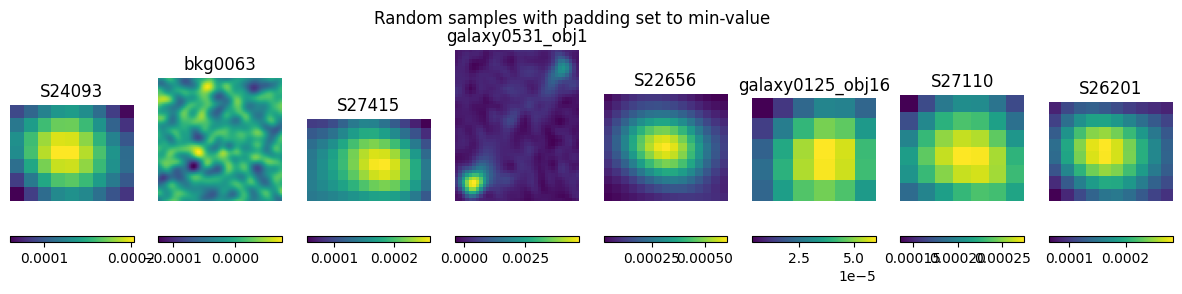

In [67]:
c = 0
how_many = 8
fig = plt.figure(figsize=(15, 3))
fig.suptitle("Random samples with padding set to min-value")

for idx, record in metadata.sample(how_many).iterrows():
    c = c + 1
    hdul = fits.open(record["path"])
    #print(hdul[0].header[''])
    npy_image = hdul[0].data
    #np.save("raw_dataset/{}-{}.npy".format(record["source_name"], record["survey"]), npy_image)
    min_image = np.min(npy_image)
    npy_image[npy_image == 0.0] = min_image

    ax = fig.add_subplot(1, howmany, c)
    ax.axis("off")

    imgplot = plt.imshow(npy_image)
    ax.set_title(record["source_name"])
    plt.colorbar(orientation='horizontal')


In [68]:
from skimage.feature import hog

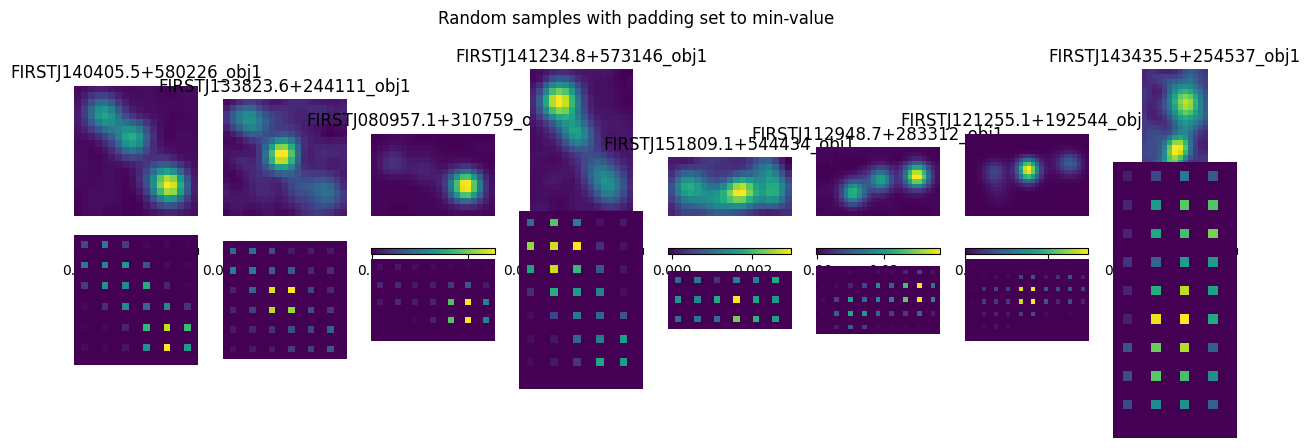

In [75]:
c = 0
how_many = 8
fig = plt.figure(figsize=(15, 6))
fig.suptitle("Random samples with padding set to min-value")

label = "COMPACT-C3"

for idx, record in metadata[metadata["label"] == label].sample(how_many).iterrows():
    c = c + 1
    hdul = fits.open(record["path"])
    #print(hdul[0].header[''])
    npy_image = hdul[0].data
    #np.save("raw_dataset/{}-{}.npy".format(record["source_name"], record["survey"]), npy_image)
    min_image = np.min(npy_image)
    npy_image[npy_image == 0.0] = min_image 

    fd, hog_image = hog(npy_image, orientations=8, pixels_per_cell=(3, 3),
        cells_per_block=(1, 1), visualize=True)

    ax = fig.add_subplot(2, howmany, c)
    ax.axis("off")

    imgplot = plt.imshow(npy_image)
    ax.set_title(record["source_name"])
    plt.colorbar(orientation='horizontal')

    ax = fig.add_subplot(1, howmany, c)
    ax.axis("off")

    imgplot = plt.imshow(hog_image)
    #ax.set_title(record["source_name"])
    #plt.colorbar(orientation='horizontal')

In [76]:
from astropy.stats import sigma_clip

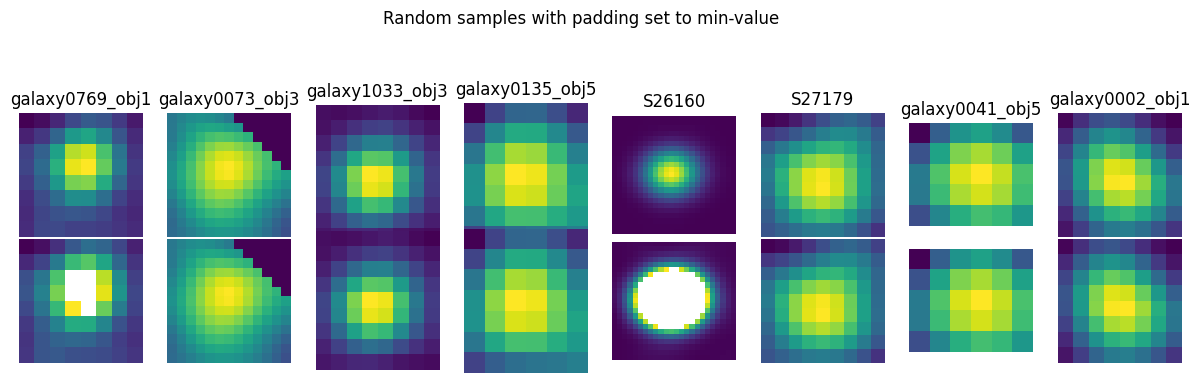

In [83]:
c = 0
how_many = 8
fig = plt.figure(figsize=(15, 6))
fig.suptitle("Random samples with padding set to min-value")

label = "COMPACT-C1"

sigma = 3

for idx, record in metadata[metadata["label"] == label].sample(how_many).iterrows():
    c = c + 1
    hdul = fits.open(record["path"])
    #print(hdul[0].header[''])
    npy_image = hdul[0].data
    #np.save("raw_dataset/{}-{}.npy".format(record["source_name"], record["survey"]), npy_image)
    min_image = np.min(npy_image)
    npy_image[npy_image == 0.0] = min_image 

    filtered_data = sigma_clip(npy_image, sigma=sigma, maxiters=5)

    ax = fig.add_subplot(2, howmany, c)
    ax.axis("off")

    imgplot = plt.imshow(npy_image)
    ax.set_title(record["source_name"])
    #plt.colorbar(orientation='horizontal')

    ax = fig.add_subplot(1, howmany, c)
    ax.axis("off")

    imgplot = plt.imshow(filtered_data)
    #ax.set_title(record["source_name"])
    #plt.colorbar(orientation='horizontal')

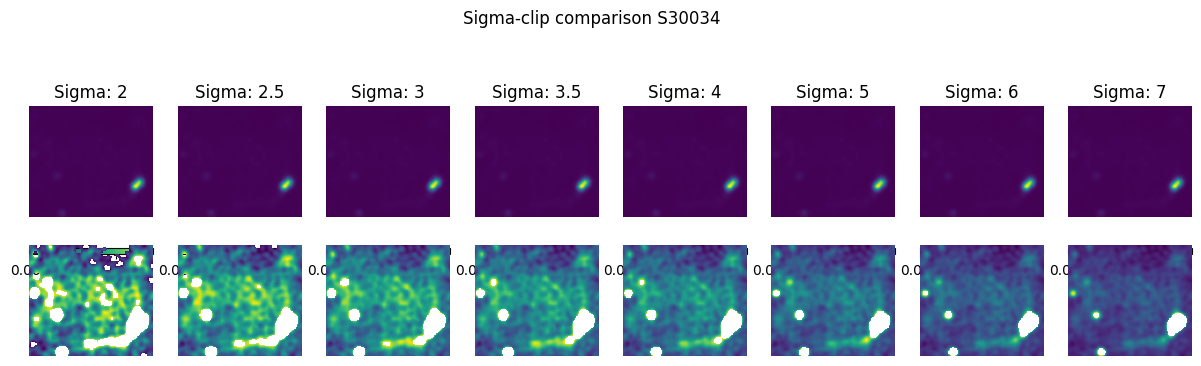

In [86]:
c = 0
how_many = 8
fig = plt.figure(figsize=(15, 6))
#source = "S100000044"
source = "S30034"
fig.suptitle("Sigma-clip comparison {}".format(source))

label = "DIFFUSE"

sigma_list = [2, 2.5, 3, 3.5, 4, 5, 6, 7]

for sigma in sigma_list:
    c = c + 1
    record = metadata[metadata["source_name"] == source].iloc[0]
    hdul = fits.open(record["path"])
    #print(hdul[0].header[''])
    npy_image = hdul[0].data
    #np.save("raw_dataset/{}-{}.npy".format(record["source_name"], record["survey"]), npy_image)
    min_image = np.min(npy_image)
    npy_image[npy_image == 0.0] = min_image 

    filtered_data = sigma_clip(npy_image, sigma=sigma, maxiters=5)

    ax = fig.add_subplot(2, howmany, c)
    ax.axis("off")

    imgplot = plt.imshow(npy_image)
    ax.set_title("Sigma: {}".format(sigma))
    plt.colorbar(orientation='horizontal')

    ax = fig.add_subplot(1, howmany, c)
    ax.axis("off")

    imgplot = plt.imshow(filtered_data)
    #ax.set_title(record["source_name"])
    #plt.colorbar(orientation='horizontal')

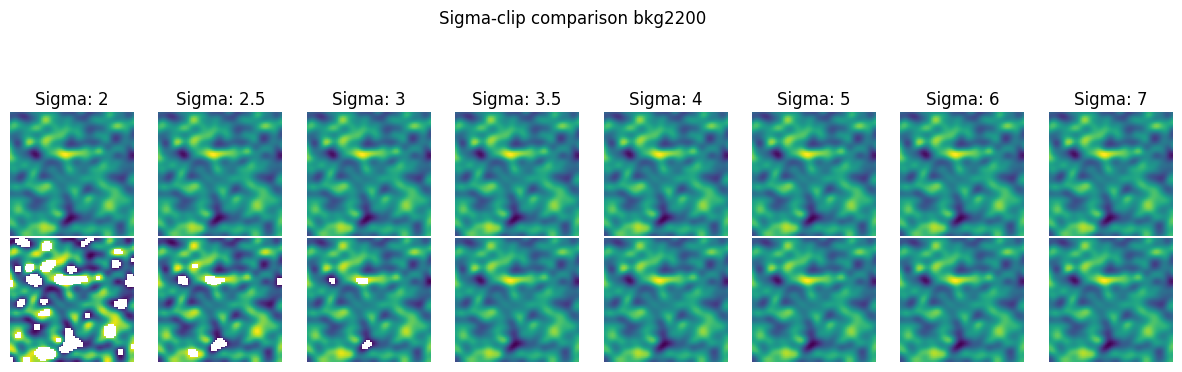

In [88]:
c = 0
how_many = 8
fig = plt.figure(figsize=(15, 6))
record = metadata.sample(1).iloc[0]
fig.suptitle("Sigma-clip comparison {}".format(record.source_name))

sigma_list = [2, 2.5, 3, 3.5, 4, 5, 6, 7]

for sigma in sigma_list:
    c = c + 1
    hdul = fits.open(record["path"])
    npy_image = hdul[0].data
    min_image = np.min(npy_image)
    npy_image[npy_image == 0.0] = min_image 
    filtered_data = sigma_clip(npy_image, sigma=sigma, maxiters=5)
    ax = fig.add_subplot(2, howmany, c)
    ax.axis("off")
    imgplot = plt.imshow(npy_image)
    ax.set_title("Sigma: {}".format(sigma))
    #plt.colorbar(orientation='horizontal')
    ax = fig.add_subplot(1, howmany, c)
    ax.axis("off")
    imgplot = plt.imshow(filtered_data)


In [ ]:
c = 0
how_many = 8
fig = plt.figure(figsize=(15, 6))
record = metadata.sample(1).iloc[0]
fig.suptitle("Sigma-clip comparison {}".format(record.source_name))

sigma_list = [2.5, 3, 3.5, 4, 5, 6, 7, 8]

hdul = fits.open(record["path"])
npy_image = hdul[0].data


for sigma in sigma_list:
    c = c + 1
    
    filtered_data, lower_bound, upper_bound = sigma_clip(npy_image, sigma=sigma, maxiters=5, return_bounds=True)
    
    min_image = np.min(filtered_data)
    #print(min_image)
    max_image = np.max(filtered_data)
    #print(max_image)
    norm_npy_image = np.zeros(npy_image.shape)
    norm_npy_image = npy_image
    #norm_npy_image[norm_npy_image == 0.0] = min_image
    norm_npy_image = (norm_npy_image - min_image) / (max_image - min_image)
    
    norm_npy_image[filtered_data.mask & (npy_image < lower_bound)] = 0.0
    norm_npy_image[filtered_data.mask & (npy_image > upper_bound)] = 1.0
    #print(np.min(norm_npy_image))
    #print(np.max(norm_npy_image))
    #print("-----")
    
    ax = fig.add_subplot(2, howmany, c)
    ax.axis("off")
    imgplot = plt.imshow(npy_image)
    ax.set_title("Sigma: {}".format(sigma))
    #plt.colorbar(orientation='horizontal')
    ax = fig.add_subplot(1, howmany, c)
    ax.axis("off")
    imgplot = plt.imshow(norm_npy_image)


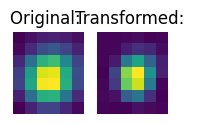

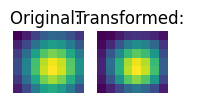

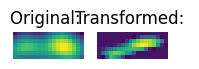

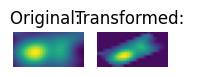

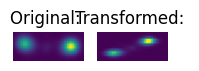

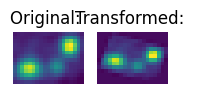

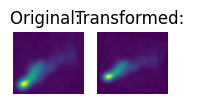

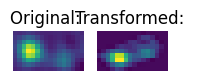

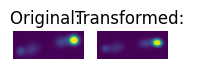

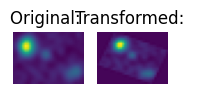

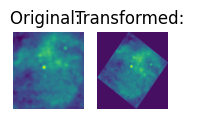

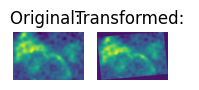

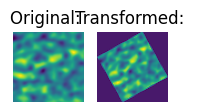

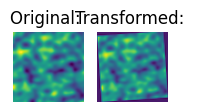

In [257]:
# Pipeline simulator

import albumentations as A
import cv2


from astropy.io.fits.verify import VerifyWarning
import warnings
warnings.simplefilter('ignore', category=VerifyWarning)

# Declare an augmentation pipeline
transform = A.Compose([
    #A.HorizontalFlip(p=0.5),
    #A.VerticalFlip(p=0.5),
    #A.Rotate(limit=45.0, border_mode=cv2.BORDER_CONSTANT, interpolation=cv2.INTER_CUBIC, crop_border=False, p=1.0)
    #A.RandomRotate90()
    A.SafeRotate(limit=45.0, border_mode=cv2.BORDER_CONSTANT, interpolation=cv2.INTER_CUBIC, p=1.0)
    #A.RandomBrightnessContrast(p=0.2),
])



how_many = 2

for label in metadata["label"].unique():
    #print(label)

    for idx, record in metadata[metadata["label"] == label].sample(how_many).iterrows():
        #print(record["path"])
        hdul = fits.open(record["path"])
        npy_image = hdul[0].data
        
        ##### SIGMA CLIP #####
        
        filtered_data, lower_bound, upper_bound = sigma_clip(npy_image, sigma=sigma, maxiters=5, return_bounds=True)
    
        min_image = np.min(filtered_data)
        #print(min_image)
        max_image = np.max(filtered_data)
        #print(max_image)
        norm_npy_image = np.zeros(npy_image.shape)
        norm_npy_image = npy_image
        #norm_npy_image[norm_npy_image == 0.0] = min_image

        ##### NORM #####
        norm_npy_image = (norm_npy_image - min_image) / (max_image - min_image)
        
        norm_npy_image[filtered_data.mask & (npy_image < lower_bound)] = 0.0
        norm_npy_image[filtered_data.mask & (npy_image > upper_bound)] = 1.0

        ##### ROTATE #####

        # Read an image with OpenCV and convert it to the RGB colorspace
        #image = cv2.imread("image.jpg")

        # Augment an image
        transformed = transform(image=norm_npy_image)
        transformed_image = transformed["image"]
        """
        
        plt.axis('off')
        
        plt.imshow(transformed_image)
        """
        fig = plt.figure(figsize=(2, 6))
        ax = fig.add_subplot(1, 2, 1)
        ax.axis("off")
        imgplot = plt.imshow(norm_npy_image)
        ax.set_title("Original: {}".format(""))

        ax = fig.add_subplot(1, 2, 2)
        ax.axis("off")
        imgplot = plt.imshow(transformed_image)
        ax.set_title("Transformed: {}".format(""))
        


/tmp/ipykernel_17782/3379201284.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist,bins = np.histogram(im.flatten(),nbr_bins,normed=True)


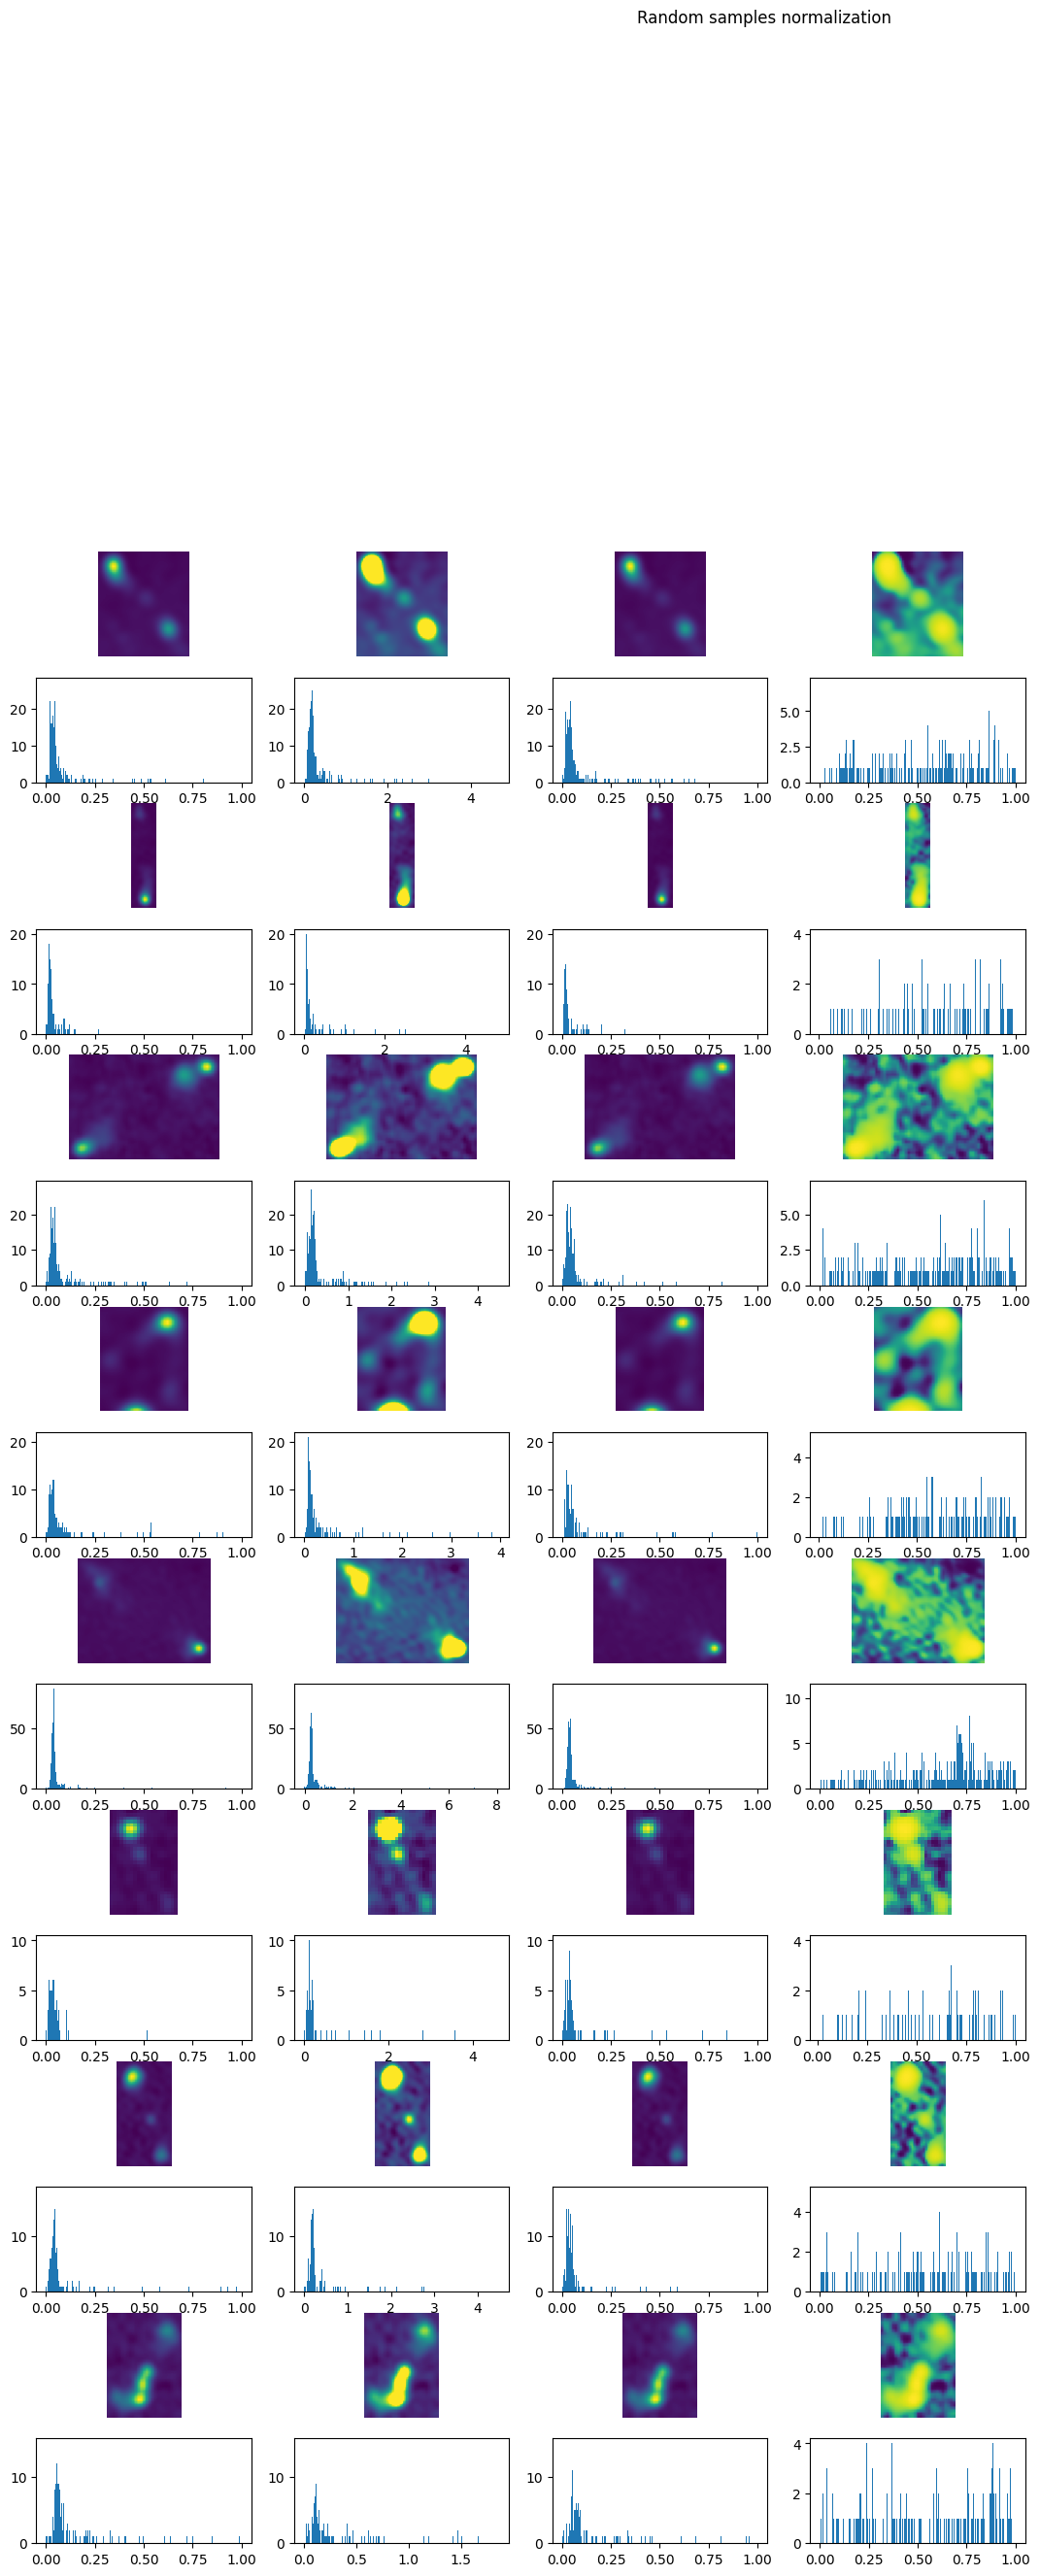

In [18]:
from astropy.stats import sigma_clip
from astropy.visualization import ZScaleInterval, HistEqStretch
import torch
import matplotlib.pyplot as plt

c = 0
how_many = 8
fig = plt.figure(figsize=(20, 30))
fig.tight_layout()
fig.suptitle("Random samples normalization")

label = "EXTENDED-MULTISLAND"

sigma = 3

for idx, record in metadata[metadata["label"] == label].sample(how_many).iterrows():
    c = c + 2

    hdul = fits.open(record["path"])
    #print(hdul[0].header[''])
    
    npy_image = hdul[0].data
    
    min = np.min(npy_image)
    max = np.max(npy_image)
    norm_0_1_image = (npy_image - min) / (max - min)
    
    interval = ZScaleInterval(contrast=0.2)
    min, max = interval.get_limits(npy_image)
    zscale_normalized_image = (npy_image - min) / (max - min)

    zscale_diff = np.absolute(norm_0_1_image - zscale_normalized_image)
    
    tanh_activation = np.tanh(npy_image)
    max = np.max(tanh_activation)
    min = np.min(tanh_activation)
    tanh_normalized_image = (npy_image - min) / (max - min)
    tanh_diff = np.absolute(norm_0_1_image - tanh_normalized_image)  

    imeq_normalized_image, _ = histeq(npy_image, nbr_bins=256)
    #max = np.max(tanh_activation)
    #min = np.min(tanh_activation)
    #imeq_normalized_image = (npy_image - min) / (max - min)
    imeq_diff = np.absolute(norm_0_1_image - imeq_normalized_image)  
    
    rows = (howmany+1)*2
    cols = 6
    
    bins = 2048
    
    pos = 1

    ax = fig.add_subplot(rows, cols, (cols*c) + pos)
    ax.axis("off")
    imgplot = plt.imshow(norm_0_1_image, vmin= 0.0, vmax= 1.0)

    #bin_counts, bin_edges = np.histogram(npy_image)

    ax = fig.add_subplot(rows, cols, (cols*(c+1)) + pos)
    #ax.axis("off")
    #bins = np.linspace(0.0, 1.0, 2048)
    
    histplot = ax.hist(norm_0_1_image.ravel(), bins= bins)

    pos += 1

    ax = fig.add_subplot(rows, cols, (cols*c) + pos)
    ax.axis("off")
    imgplot = plt.imshow(zscale_normalized_image, vmin= 0.0, vmax= 1.0)

    ax = fig.add_subplot(rows, cols, (cols*(c+1)) + pos)
    #ax.axis("off")
    histplot = ax.hist(zscale_normalized_image.ravel(), bins= bins)

    pos += 1

    ax = fig.add_subplot(rows, cols, (cols*c) + pos)
    ax.axis("off")
    imgplot = plt.imshow(tanh_normalized_image, vmin= 0.0, vmax= 1.0)

    ax = fig.add_subplot(rows, cols, (cols*(c+1)) + pos)
    #ax.axis("off")
    histplot = ax.hist(tanh_normalized_image.ravel(), bins= bins)
    #approx_median = np.percentile(gray_image, 50)

    pos += 1

    ax = fig.add_subplot(rows, cols, (cols*c) + pos)
    ax.axis("off")
    imgplot = plt.imshow(imeq_normalized_image, vmin= 0.0, vmax= 1.0)

    ax = fig.add_subplot(rows, cols, (cols*(c+1)) + pos)
    #ax.axis("off")
    histplot = ax.hist(imeq_normalized_image.ravel(), bins= bins)
    #approx_median = np.percentile(gray_image, 50)

    """
    pos += 1
    
    ax = fig.add_subplot(rows, cols, (cols*c) + pos)
    ax.axis("off")
    imgplot = plt.imshow(zscale_diff, vmin= 0.0, vmax= 1.0)

    ax = fig.add_subplot(rows, cols, (cols*(c+1)) + pos)
    #ax.axis("off")
    #histplot = ax.hist(zscale_diff.ravel(), bins= bins, log=True)

    pos += 1

    ax = fig.add_subplot(rows, cols, (cols*c) + pos)
    ax.axis("off")
    imgplot = plt.imshow(tanh_diff, vmin= 0.0, vmax= 1.0)

    ax = fig.add_subplot(rows, cols, (cols*(c+1)) + pos)
    #ax.axis("off")
    #histplot = ax.hist(tanh_diff.ravel(), bins= bins, log=True)
    """

In [12]:
def histeq(im,nbr_bins=2048):
    # obtain the image histogram
    imhist,bins = np.histogram(im.flatten(),nbr_bins,normed=True)
    # derive the cumulative distribution function, CDF
    cdf = imhist.cumsum()      
    # normalise the CDF
    cdf = cdf / cdf[-1]
    
    # use linear interpolation of CDF to find new pixel values
    im2 = np.interp(im.flatten(),bins[:-1],cdf)
    
    return im2.reshape(im.shape), cdf

[54 33]
(18, 15)
[28 38]
(11, 20)
[ 0 17]
(57, 13)
[27 61]
(22, 17)
[61 45]
(15, 27)
[29 61]
(14, 19)
[47 42]
(48, 37)
[47 41]
(26, 52)


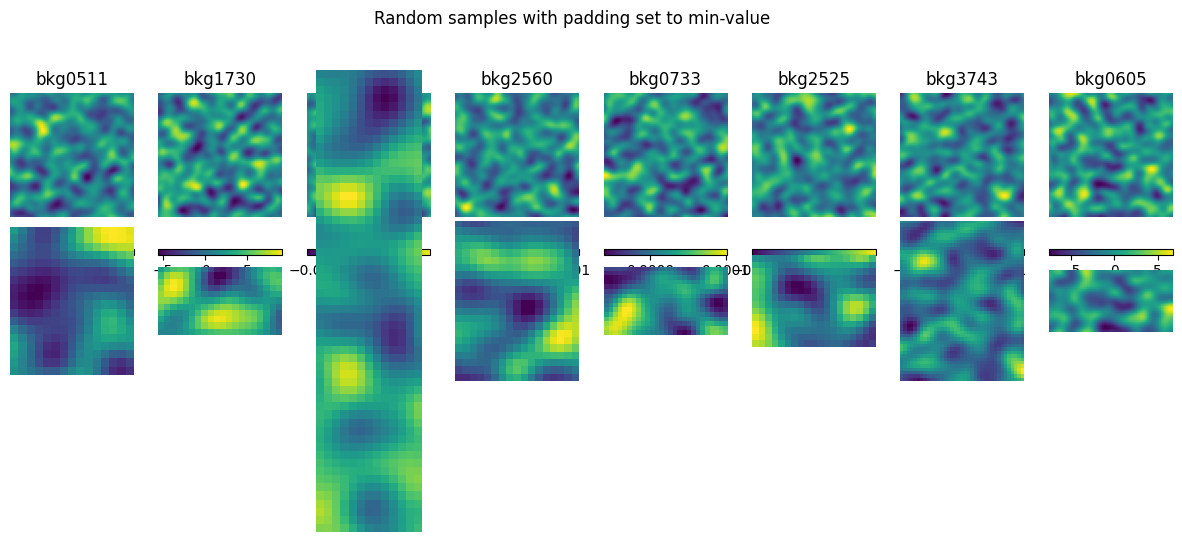

In [25]:
import matplotlib.pyplot as plt
c = 0
howmany = 8
fig = plt.figure(figsize=(15, 6))
fig.suptitle("Random samples with padding set to min-value")

label = "BACKGROUND"

for idx, record in metadata[metadata["label"] == label].sample(how_many).iterrows():
    c = c + 1
    hdul = fits.open(record["path"])
    #print(hdul[0].header[''])
    npy_image = hdul[0].data
    #np.save("raw_dataset/{}-{}.npy".format(record["source_name"], record["survey"]), npy_image)
    min_image = np.min(npy_image)
    npy_image[npy_image == 0.0] = min_image 

    ax = fig.add_subplot(2, howmany, c)
    ax.axis("off")

    imgplot = plt.imshow(npy_image)
    ax.set_title(record["source_name"])
    plt.colorbar(orientation='horizontal')

    ax = fig.add_subplot(1, howmany, c)
    ax.axis("off")
    #print(npy_image.shape[0])
    min_crop_size = 8
    min_x = np.random.randint(0, npy_image.shape[0] - min_crop_size*2, size=1)[0]
    min_y = np.random.randint(0, npy_image.shape[1] - min_crop_size*2, size=1)[0]
    max_x = np.random.randint(min_x+min_crop_size, npy_image.shape[0], size=1)[0]
    max_y = np.random.randint(min_y+min_crop_size, npy_image.shape[1], size=1)[0]
    #print(np.random.randint(0, 63, size=2))
    #print(npy_image[0, 0])
    new_image = npy_image[min_x:max_x, min_y:max_y]
    #print(new_image.shape)
    imgplot = plt.imshow(new_image)
    #ax.set_title(record["source_name"])npy_image[min_x:max_x, min_y:max_y]
    #plt.colorbar(orientation='horizontal')